# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

### Load Data

In [2]:
import pandas as pd

df = pd.read_csv('../Week1/churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   object 
 2   Contract        7043 non-null   object 
 3   PaymentMethod   7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 440.2+ KB


In [5]:
from pycaret.classification import ClassificationExperiment #setup, compare_models, predict_model, save_model, load_model

In [6]:
automl = ClassificationExperiment() #setup(df, target='Diabetes')

In [8]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,2845
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 7)"
5,Transformed data shape,"(7043, 12)"
6,Transformed train set shape,"(4930, 12)"
7,Transformed test set shape,"(2113, 12)"
8,Numeric features,3
9,Categorical features,3


In [9]:
automl

In [10]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7998,0.8352,0.7998,0.7908,0.7931,0.4554,0.4594,0.4930
gbc,Gradient Boosting Classifier,0.7947,0.8392,0.7947,0.7830,0.7843,0.4274,0.4353,0.0760
ada,Ada Boost Classifier,0.7939,0.8354,0.7939,0.7837,0.7856,0.4337,0.4393,0.0450
ridge,Ridge Classifier,0.7931,0.8260,0.7931,0.7800,0.7807,0.4152,0.4254,0.0180
lda,Linear Discriminant Analysis,0.7882,0.8260,0.7882,0.7793,0.7817,0.4270,0.4305,0.0190
lightgbm,Light Gradient Boosting Machine,0.7842,0.8229,0.7842,0.7737,0.7764,0.4108,0.4151,0.1050
knn,K Neighbors Classifier,0.7694,0.7505,0.7694,0.7551,0.7584,0.3596,0.3657,0.3250
svm,SVM - Linear Kernel,0.7677,0.7481,0.7677,0.7549,0.7527,0.3440,0.3571,0.0200
rf,Random Forest Classifier,0.7629,0.7879,0.7629,0.7545,0.7573,0.3659,0.3681,0.0810
et,Extra Trees Classifier,0.7483,0.7625,0.7483,0.7422,0.7442,0.3357,0.3372,0.0730


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [11]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2845, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

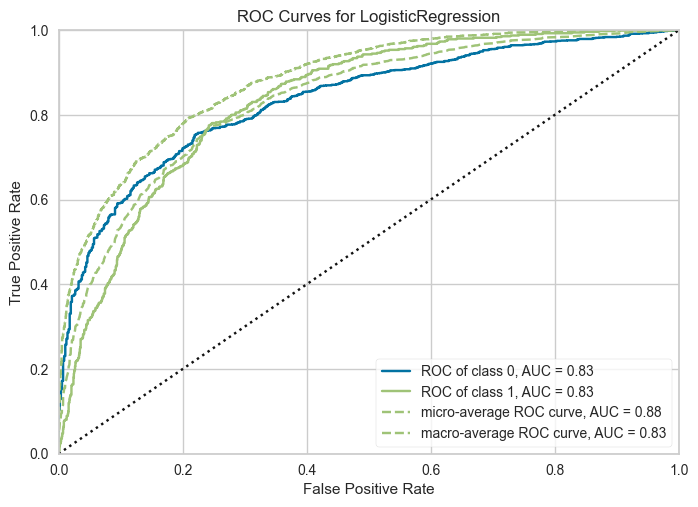

In [13]:
automl.plot_model(best_model)

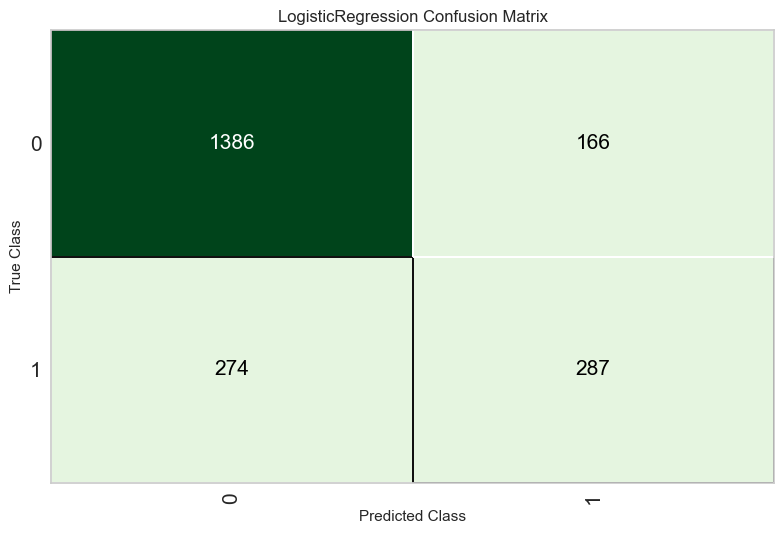

In [14]:
automl.plot_model(best_model, plot = 'confusion_matrix')

In [15]:
df.iloc[-2:-1].shape

(1, 7)

In [16]:
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,Yes,Yes,0.5042


In [17]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7978,0.8365,0.7978,0.7883,0.7908,0.4490,0.4531


In [18]:
predictions.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.850000,29.850000,No,Yes,0.5894
5575-GNVDE,34,Yes,One year,Mailed check,56.950001,1889.500000,No,No,0.9400
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.849998,108.150002,Yes,No,0.6157
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.299999,1840.750000,No,No,0.9349
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.699997,151.649994,Yes,Yes,0.6269


In [19]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                 

In [20]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [21]:
new_pycaret.predict_model(loaded_model, df.iloc[-2:-1])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,Yes,Yes,0.5042


In [31]:
from IPython.display import Code

Code('predict_churn.py')

import pandas as pd
from pycaret.classification import predict_model, load_model

model = load_model('GBC')

def load_data(filepath):
    """
    Loads churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df


def make_predictions(df, threshold=0.5):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    Rounds up to 1 if greater than or equal to the threshold.
    """
    predictions = predict_model(model, data=df)
    predictions['Churn_prediction'] = (predictions['Score'] >= threshold)
    predictions['Churn_prediction'].replace({True: 'Churn', False: 'No churn'}, inplace=True)
    drop_cols = predictions.columns.tolist()
    drop_cols.remove('Churn_prediction')
    return predictions.drop(drop_cols, axis=1)


if __name__ == "__main__":
    df = load_data('new_churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

In [33]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded


KeyError: 'Score'

# Summary

Write a short summary of the process and results here.